<a href="https://colab.research.google.com/github/rohanguptha/INFO5731/blob/master/bompally_selfstudy8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self Study 8

In [0]:
from matplotlib import pyplot as plt

In [0]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]


In [0]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [0]:
for user in users:
    user["friends"] = []

In [8]:
users

[{'friends': [], 'id': 0, 'name': 'Hero'},
 {'friends': [], 'id': 1, 'name': 'Dunn'},
 {'friends': [], 'id': 2, 'name': 'Sue'},
 {'friends': [], 'id': 3, 'name': 'Chi'},
 {'friends': [], 'id': 4, 'name': 'Thor'},
 {'friends': [], 'id': 5, 'name': 'Clive'},
 {'friends': [], 'id': 6, 'name': 'Hicks'},
 {'friends': [], 'id': 7, 'name': 'Devin'},
 {'friends': [], 'id': 8, 'name': 'Kate'},
 {'friends': [], 'id': 9, 'name': 'Klein'},
 {'friends': [], 'id': 10, 'name': 'Jen'}]

In [0]:
for i, j in friendships:
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i


In [10]:
users

[{'friends': [{'friends': [{...},
     {'friends': [{...},
       {...},
       {'friends': [{...},
         {...},
         {'friends': [{...},
           {'friends': [{...},
             {'friends': [{...},
               {'friends': [{...},
                 {'friends': [{...}, {...}], 'id': 7, 'name': 'Devin'},
                 {'friends': [{...}], 'id': 9, 'name': 'Klein'}],
                'id': 8,
                'name': 'Kate'}],
              'id': 6,
              'name': 'Hicks'},
             {'friends': [{...},
               {'friends': [{'friends': [{...}, {...}],
                  'id': 6,
                  'name': 'Hicks'},
                 {...},
                 {'friends': [{...}], 'id': 9, 'name': 'Klein'}],
                'id': 8,
                'name': 'Kate'}],
              'id': 7,
              'name': 'Devin'}],
            'id': 5,
            'name': 'Clive'}],
          'id': 4,
          'name': 'Thor'}],
        'id': 3,
        'name': 'Chi'}],
      

In [0]:
def number_of_friends(user):
    return len(user["friends"]) # length of friend_ids list

total_connections = sum(number_of_friends(user) for user in users) 

num_users = len(users)
avg_connections = total_connections / num_users 


In [15]:
avg_connections

2.1818181818181817

In [16]:
total_connections

24

In [17]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
sorted(num_friends_by_id, key= lambda userid_numfriends: userid_numfriends[1], reverse=True) 

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1),
 (10, 0)]

In [0]:
def friends_of_friend_ids_bad(user):
    return [foaf["id"]
            for friend in user["friends"] 
            for foaf in friend["friends"]] 


In [19]:
print ([friend["id"] for friend in users[0]["friends"]]) 
print ([friend["id"] for friend in users[1]["friends"]]) 
print ([friend["id"] for friend in users[2]["friends"]]) 

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [0]:
from collections import Counter

def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]  # for each of my friends
                   for foaf in friend["friends"]  # count *their* friends
                   if not_the_same(user, foaf)    # who aren't me
                   and not_friends(user, foaf))   # and aren't my friends

In [21]:
print (friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [0]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [0]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]


In [24]:
data_scientists_who_like("Hadoop")

[0, 9]

In [25]:
data_scientists_who_like("MapReduce")

[9]

In [0]:
from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [27]:
interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [28]:
user_ids_by_interest

defaultdict(list,
            {'Big Data': [0, 8, 9],
             'C++': [5],
             'Cassandra': [0, 1],
             'HBase': [0, 1],
             'Hadoop': [0, 9],
             'Haskell': [5],
             'Java': [0, 5, 9],
             'Mahout': [7],
             'MapReduce': [9],
             'MongoDB': [1],
             'NoSQL': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'R': [3, 5],
             'Spark': [0],
             'Storm': [0],
             'artificial intelligence': [8],
             'decision trees': [4],
             'deep learning': [8],
             'libsvm': [4],
             'machine learning': [4, 7],
             'mathematics': [6],
             'neural networks': [7, 8],
             'numpy': [2],
             'pandas': [2],
             'probability': [3, 6],
             'programming languages': [5],
             'regression': [3, 4],
             'scikit-learn': [2, 7],
             'scipy': [2],
             's

In [0]:
def most_common_interests_with(user_id):
    return Counter(interested_user_id
        for interest in interests_by_user_id["user_id"]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user_id)


In [33]:
most_common_interests_with(3)

Counter()

In [0]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

In [0]:
def make_chart_salaries_by_tenure():
    tenures = [tenure for salary, tenure in salaries_and_tenures]
    salaries = [salary for salary, tenure in salaries_and_tenures]
    plt.scatter(tenures, salaries)
    plt.xlabel("Years Experience")
    plt.ylabel("Salary")
    plt.show()

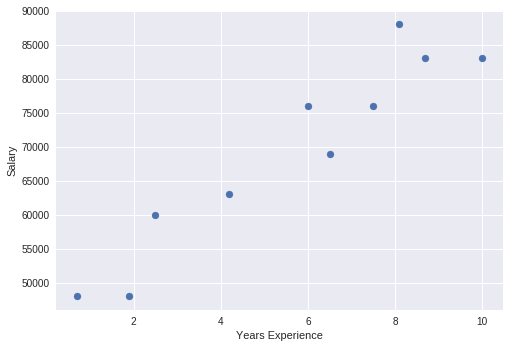

In [36]:
make_chart_salaries_by_tenure()


In [0]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [38]:
salary_by_tenure

defaultdict(list,
            {0.7: [48000],
             1.9: [48000],
             2.5: [60000],
             4.2: [63000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             8.1: [88000],
             8.7: [83000],
             10: [83000]})

In [39]:
average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

In [0]:
def tenure_bucket(tenure):
    if tenure < 2: return "less than two"
    elif tenure < 5: return "between two and five"
    else: return "more than five"

In [41]:
tenure_bucket(5)

'more than five'

In [0]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [43]:
salary_by_tenure_bucket

defaultdict(list,
            {'between two and five': [60000, 63000],
             'less than two': [48000, 48000],
             'more than five': [83000, 88000, 76000, 69000, 76000, 83000]})

In [44]:
average_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 79166.66666666667}

In [0]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0: return "paid"
  elif years_experience < 8.5: return "unpaid"
  else: return "paid"


In [47]:
predict_paid_or_unpaid(5)

'unpaid'

In [0]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [0]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

In [50]:
words_and_counts

Counter({'artificial': 1,
         'big': 3,
         'c++': 1,
         'cassandra': 2,
         'data': 3,
         'decision': 1,
         'deep': 1,
         'hadoop': 2,
         'haskell': 1,
         'hbase': 2,
         'intelligence': 1,
         'java': 3,
         'languages': 1,
         'learning': 3,
         'libsvm': 1,
         'machine': 2,
         'mahout': 1,
         'mapreduce': 1,
         'mathematics': 1,
         'mongodb': 1,
         'networks': 2,
         'neural': 2,
         'nosql': 1,
         'numpy': 1,
         'pandas': 1,
         'postgres': 1,
         'probability': 2,
         'programming': 1,
         'python': 3,
         'r': 2,
         'regression': 2,
         'scikit-learn': 2,
         'scipy': 1,
         'spark': 1,
         'statistics': 2,
         'statsmodels': 1,
         'storm': 1,
         'theory': 1,
         'trees': 1})

In [51]:
if __name__ == "__main__":

    print()
    print("######################")
    print("#")
    print("# FINDING KEY CONNECTORS")
    print("#")
    print("######################")
    print()


    print("total connections", total_connections)
    print("number of users", num_users)
    print("average connections", total_connections / num_users)
    print()

    # create a list (user_id, number_of_friends)
    num_friends_by_id = [(user["id"], number_of_friends(user))
                         for user in users]

    print("users sorted by number of friends:")
    print(sorted(num_friends_by_id,
                 key=lambda pair: pair[1],                       # by number of friends
                 reverse=True))                                  # largest to smallest

    print()
    print("######################")
    print("#")
    print("# DATA SCIENTISTS YOU MAY KNOW")
    print("#")
    print("######################")
    print()


    print("friends of friends bad for user 0:", friends_of_friend_ids_bad(users[0]))
    print("friends of friends for user 3:", friends_of_friend_ids(users[3]))

    print()
    print("######################")
    print("#")
    print("# SALARIES AND TENURES")
    print("#")
    print("######################")
    print()

    print("average salary by tenure", average_salary_by_tenure)
    print("average salary by tenure bucket", average_salary_by_bucket)

    print()
    print("######################")
    print("#")
    print("# MOST COMMON WORDS")
    print("#")
    print("######################")
    print()
    
    for word, count in words_and_counts.most_common():
        if count > 1:
            print (word, count)


######################
#
# FINDING KEY CONNECTORS
#
######################

total connections 24
number of users 11
average connections 2.1818181818181817

users sorted by number of friends:
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1), (10, 0)]

######################
#
# DATA SCIENTISTS YOU MAY KNOW
#
######################

friends of friends bad for user 0: [0, 2, 3, 0, 1, 3]
friends of friends for user 3: Counter({0: 2, 5: 1})

######################
#
# SALARIES AND TENURES
#
######################

average salary by tenure {8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}
average salary by tenure bucket {'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}

######################
#
# MOST COMMON WORDS
#
######################

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
s

In [0]:
import matplotlib.pyplot as plt
from collections import Counter

In [0]:
def make_chart_simple_line_chart():

    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

    # add a title
    plt.title("Nominal GDP")

    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

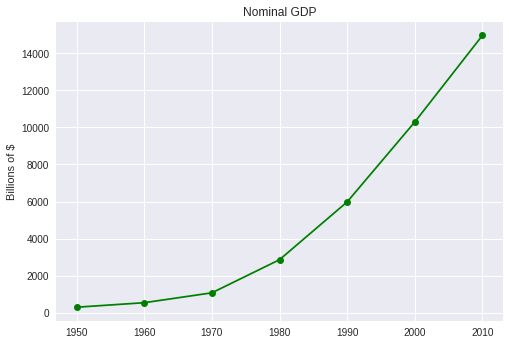

In [54]:
make_chart_simple_line_chart()

In [0]:
def make_chart_simple_bar_chart():

    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]

    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    # so that each bar is centered
    xs = [i + 0.1 for i, _ in enumerate(movies)]

    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")

    # label x-axis with movie names at bar centers
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)

    plt.show()

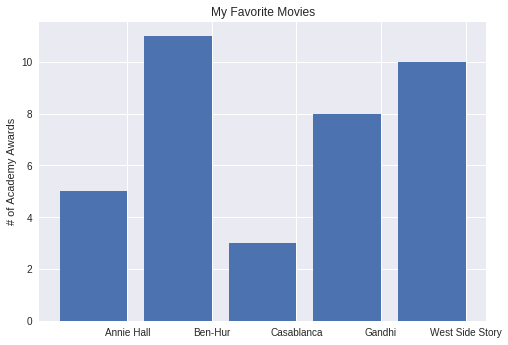

In [56]:
make_chart_simple_bar_chart()

In [0]:
def make_chart_histogram():
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)

    plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

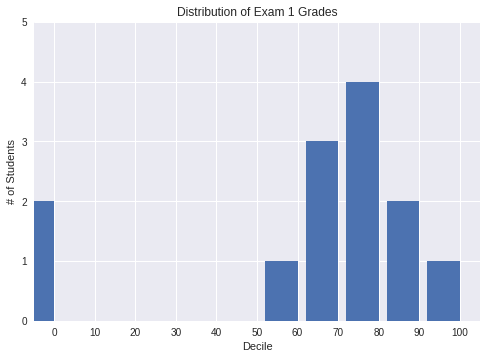

In [58]:
make_chart_histogram()

In [0]:
def make_chart_misleading_y_axis(mislead=True):

    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    # if you don't do this, matplotlib will label the x-axis 0, 1
    # and then add a +2.013e3 off in the corner (bad matplotlib!)
    plt.ticklabel_format(useOffset=False)

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506])
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Not So Huge Anymore.")
    plt.show()

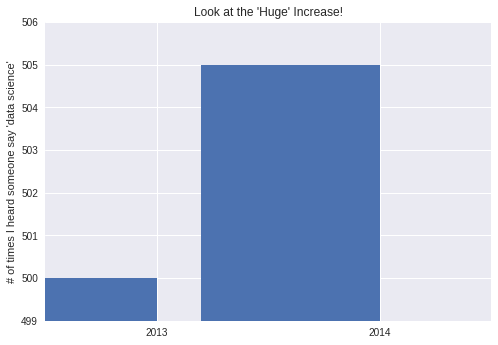

In [60]:
make_chart_misleading_y_axis()

In [0]:
def make_chart_several_line_charts():

    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]

    xs = range(len(variance))

    # we can make multiple calls to plt.plot
    # to show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # because we've assigned labels to each series
    # we can get a legend for free
    # loc=9 means "top center"
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()


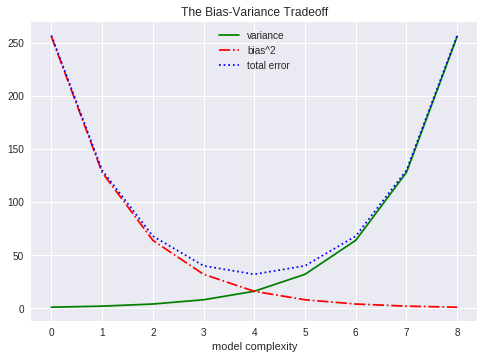

In [62]:
make_chart_several_line_charts()

In [0]:
def make_chart_scatter_plot():

    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)

    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()

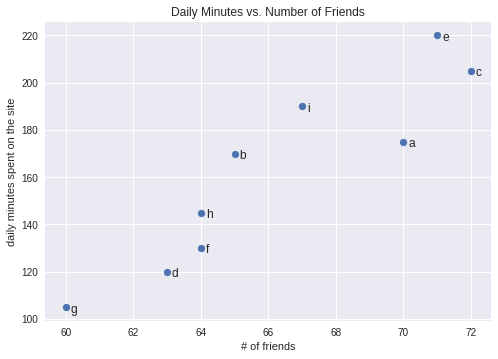

In [64]:
make_chart_scatter_plot()

In [0]:
def make_chart_scatterplot_axes(equal_axes=False):

    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal")
    else:
        plt.title("Axes Aren't Comparable")

    plt.show()

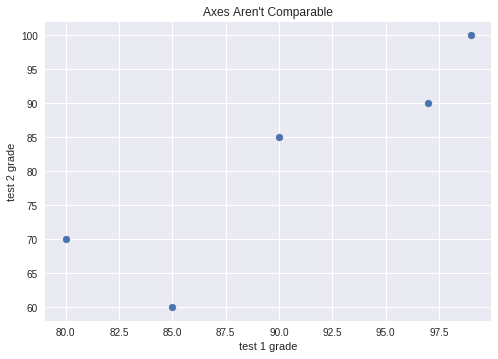

In [66]:
make_chart_scatterplot_axes()

In [0]:
def make_chart_pie_chart():

    plt.pie([0.95, 0.05], labels=["Uses pie charts", "Knows better"])

    # make sure pie is a circle and not an oval
    plt.axis("equal")
    plt.show()



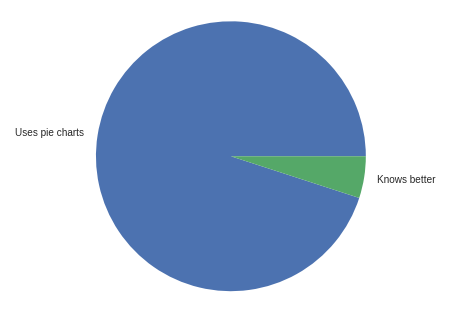

In [68]:
make_chart_pie_chart()

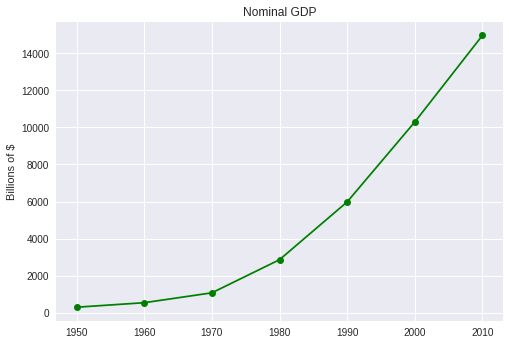

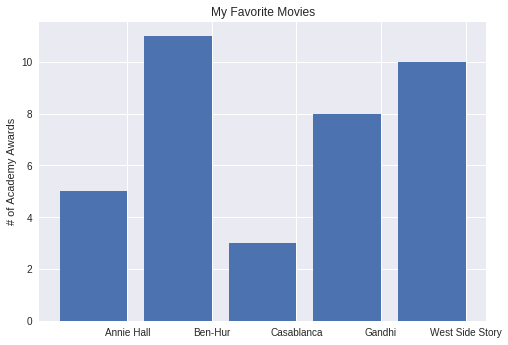

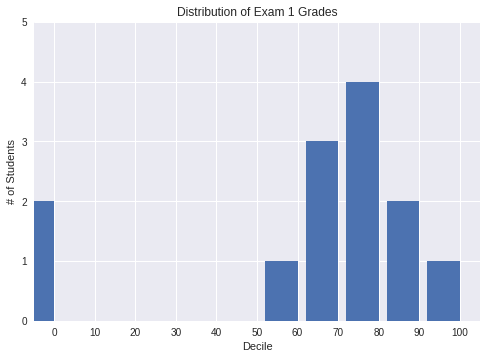

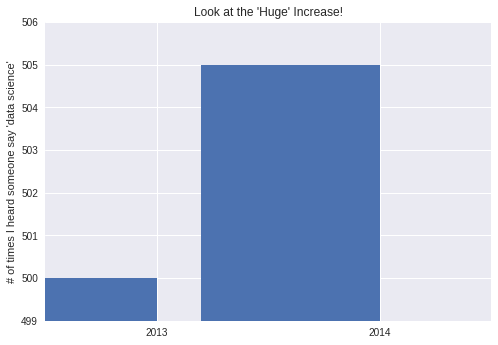

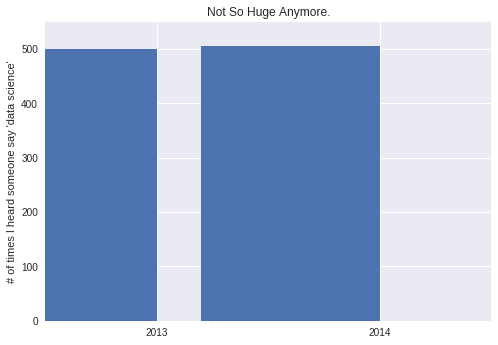

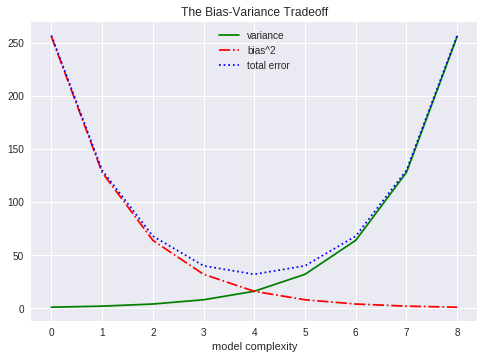

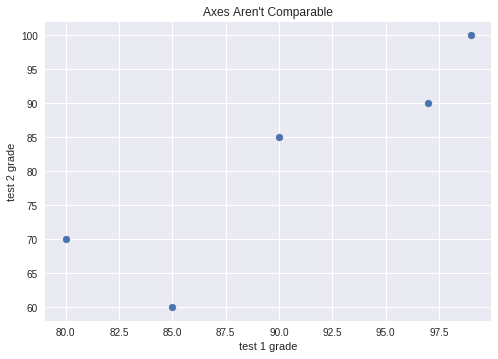

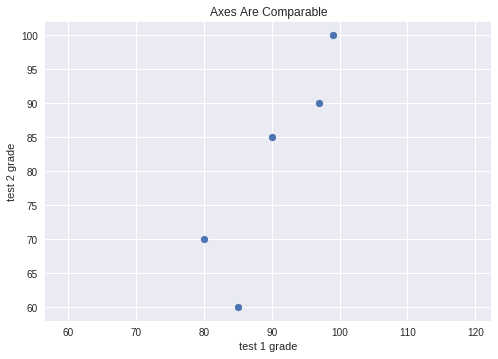

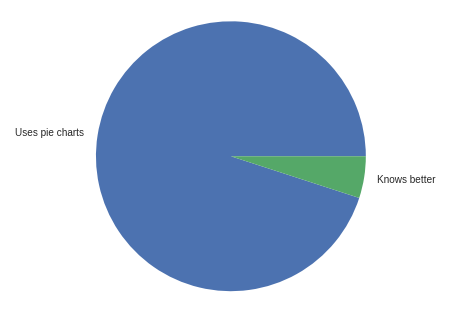

In [69]:

if __name__ == "__main__":

    make_chart_simple_line_chart()

    make_chart_simple_bar_chart()

    make_chart_histogram()

    make_chart_misleading_y_axis(mislead=True)

    make_chart_misleading_y_axis(mislead=False)

    make_chart_several_line_charts()

    make_chart_scatterplot_axes(equal_axes=False)

    make_chart_scatterplot_axes(equal_axes=True)

    make_chart_pie_chart()

In [0]:
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce


In [0]:
height_weight_age = [70, # inches,
 170, # pounds,
40 ] # years

In [0]:
grades = [95, # exam1
 80, # exam2
 75, # exam3
 62 ] # exam4   

In [0]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]


In [0]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]


In [0]:
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [0]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]


In [77]:
scalar_multiply(height_weight_age, grades)

[[70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,
  40,
  70,
  170,

In [0]:
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [0]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [0]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)


In [0]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [0]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

In [0]:
def distance(v, w):
    return math.sqrt(squared_distance(v, w))

In [84]:
dot(height_weight_age, grades)

23250

In [85]:
sum_of_squares(height_weight_age)

35400

In [86]:
magnitude(height_weight_age)

188.1488772222678

In [87]:
squared_distance(height_weight_age, grades)

9950

In [88]:
distance(height_weight_age, grades)

99.74968671630002

In [89]:
def distance(v, w):
    return magnitude(vector_subtract(v, w))
distance(height_weight_age, grades)

99.74968671630002

In [0]:
A = [[1, 2, 3], # A has 2 rows and 3 columns
 [4, 5, 6]]
B = [[1, 2], # B has 3 rows and 2 columns
 [3, 4],
 [5, 6]]

In [0]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [92]:
shape(A)

(2, 3)

In [0]:
def get_row(A, i):
    return A[i]

In [94]:
get_row(A, 1)

[4, 5, 6]

In [0]:
def get_column(A, j):
    return [A_i[j] for A_i in A]

In [96]:
get_column(A, 1)

[2, 5]

In [0]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]


In [0]:
def is_diagonal(i, j):
 """1's on the 'diagonal', 0's everywhere else"""
 return 1 if i == j else 0
identity_matrix = make_matrix(5, 5, is_diagonal)

In [0]:
identity_matrix = make_matrix(5, 5, is_diagonal)

In [100]:
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [0]:
data = [[70, 170, 40],
 [65, 120, 26],
 [77, 250, 19],
 # ....
 ]

In [0]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
 (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


In [0]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [104]:
friendships[0][2] == 1 # True, 0 and 2 are friends

True

In [105]:
friendships[0][8] == 1 # False, 0 and 8 are not friends

False

In [0]:
friends_of_five = [i # only need
 for i, is_friend in enumerate(friendships[5]) # to look at
 if is_friend] # one row

In [107]:
friends_of_five

[4, 6, 7]

In [0]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")

    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]

    return make_matrix(num_rows, num_cols, entry_fn)

In [0]:
def make_graph_dot_product_as_vector_projection(plt):

    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]

    plt.arrow(0, 0, v[0], v[1],
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1],
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1],
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis('equal')
    plt.show()

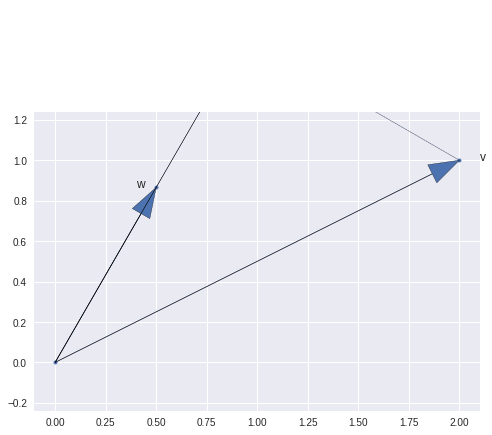

In [110]:
make_graph_dot_product_as_vector_projection(plt)

In [0]:
from collections import Counter, defaultdict
from functools import partial, reduce
import math, random, csv
import matplotlib.pyplot as plt
import dateutil.parser

In [0]:
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

In [0]:
def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

In [0]:
def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [0]:
def compare_two_distributions():

    random.seed(0)

    uniform = [random.randrange(-100,101) for _ in range(200)]
    normal = [57 * inverse_normal_cdf(random.random())
              for _ in range(200)]

    plot_histogram(uniform, 10, "Uniform Histogram")
    plot_histogram(normal, 10, "Normal Histogram")

In [0]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [0]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

In [0]:
import random
random.seed(0)
# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]
# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
 for _ in range(10000)]

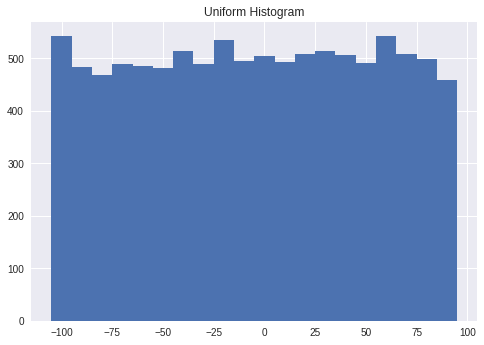

In [119]:
plot_histogram(uniform, 10, "Uniform Histogram")

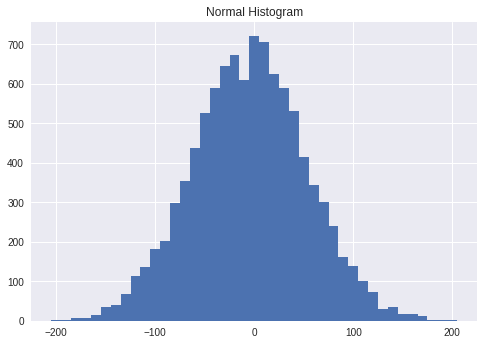

In [120]:
plot_histogram(normal, 10, "Normal Histogram")

In [0]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())


In [0]:
xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]


In [0]:
def scatter():
    plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
    plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.legend(loc=9)
    plt.title("Very Different Joint Distributions")
    plt.show()


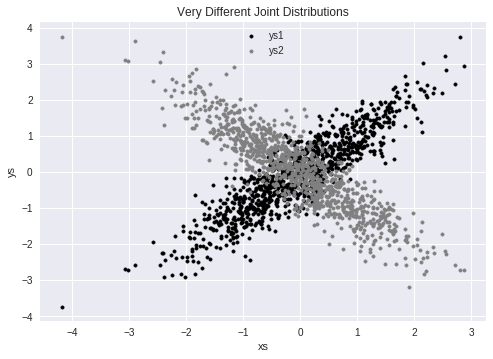

In [124]:
scatter()

In [0]:
def mean(x):
    return sum(x) / len(x)
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)
def standard_deviation(x):
    return math.sqrt(variance(x))
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

In [126]:
print (correlation(xs, ys1))

0.9010493686379609


In [127]:
print (correlation(xs, ys2))

-0.8920981526880033


In [0]:
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""

    _, num_columns = shape(data)
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))

    return make_matrix(num_columns, num_columns, matrix_entry)



In [0]:
def make_scatterplot_matrix():

    # first, generate some random data

    num_points = 100

    def random_row():
        row = [None, None, None, None]
        row[0] = random_normal()
        row[1] = -5 * row[0] + random_normal()
        row[2] = row[0] + row[1] + 5 * random_normal()
        row[3] = 6 if row[2] > -2 else 0
        return row
    random.seed(0)
    data = [random_row()
            for _ in range(num_points)]

    # then plot it

    _, num_columns = shape(data)
    fig, ax = plt.subplots(num_columns, num_columns)

    for i in range(num_columns):
        for j in range(num_columns):

            # scatter column_j on the x-axis vs column_i on the y-axis
            if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))

            # unless i == j, in which case show the series name
            else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

            # then hide axis labels except left and bottom charts
            if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
            if j > 0: ax[i][j].yaxis.set_visible(False)

    # fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())

    plt.show()

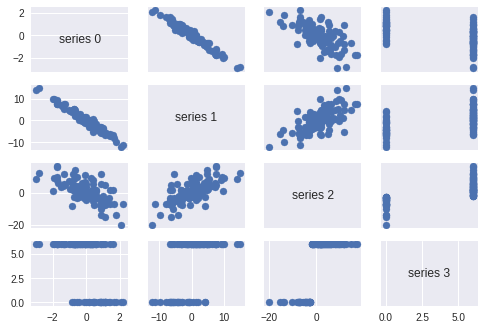

In [130]:
make_scatterplot_matrix()

In [0]:
def parse_row(input_row, parsers):
    """given a list of parsers (some of which may be None)
    apply the appropriate one to each element of the input_row"""
    return [parser(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]


In [0]:
def parse_rows_with(reader, parsers):
    """wrap a reader to apply the parsers to each of its rows"""
    for row in reader:
        yield parse_row(row, parsers)


In [0]:
def try_or_none(f):
    """wraps f to return None if f raises an exception
    assumes f takes only one input"""
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none

In [0]:
def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None else value
            for value, parser in zip(input_row, parsers)]


In [0]:
import dateutil.parser
data = []
with open("comma_delimited_stock_prices.csv", "r") as f:
    reader = csv.reader(f)
    for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
        data.append(line)

In [0]:
for row in data:
    if any(x is None for x in row):
        print(row)

In [0]:
def try_parse_field(field_name, value, parser_dict):
    """try to parse value using the appropriate function from parser_dict"""
    parser = parser_dict.get(field_name) # None if no such entry
    if parser is not None:
        return try_or_none(parser)(value)
    else:
        return value

In [0]:
def parse_dict(input_dict, parser_dict):
    return { field_name : try_parse_field(field_name, value, parser_dict)
             for field_name, value in input_dict.items() }

In [0]:
import datetime
data = [
 {'closing_price': 102.06,
 'date': datetime.datetime(2014, 8, 29, 0, 0),
 'symbol': 'AAPL'},
 # ...
]

In [0]:
max_aapl_price = max(row["closing_price"]
                     for row in data
                     if row["symbol"] == "AAPL")

In [141]:
max_aapl_price

102.06

In [0]:
# group rows by symbol
by_symbol = defaultdict(list)
for row in data:
    by_symbol[row["symbol"]].append(row)
# use a dict comprehension to find the max for each symbol
max_price_by_symbol = { symbol : max(row["closing_price"]
                                     for row in grouped_rows)
                        for symbol, grouped_rows in by_symbol.items() }

In [143]:
max_price_by_symbol

{'AAPL': 102.06}

In [0]:
def picker(field_name):
    """returns a function that picks a field out of a dict"""
    return lambda row: row[field_name]

def pluck(field_name, rows):
    """turn a list of dicts into the list of field_name values"""
    return map(picker(field_name), rows)


In [0]:
def group_by(grouper, rows, value_transform=None):
    # key is output of grouper, value is list of rows
    grouped = defaultdict(list)
    for row in rows:
        grouped[grouper(row)].append(row)
    if value_transform is None:
        return grouped
    else:
        return { key : value_transform(rows)
                 for key, rows in grouped.items() }


In [0]:
max_price_by_symbol = group_by(picker("symbol"),
                               data,
                               lambda rows: max(pluck("closing_price", rows)))

In [147]:
max_price_by_symbol

{'AAPL': 102.06}

In [0]:
def percent_price_change(yesterday, today):
    return today["closing_price"] / yesterday["closing_price"] - 1

In [0]:
def day_over_day_changes(grouped_rows):
    # sort the rows by date
    ordered = sorted(grouped_rows, key=picker("date"))
    # zip with an offset to get pairs of consecutive days
    return [{ "symbol" : today["symbol"],
              "date" : today["date"],
              "change" : percent_price_change(yesterday, today) }
             for yesterday, today in zip(ordered, ordered[1:])]

In [0]:
# key is symbol, value is list of "change" dicts
changes_by_symbol = group_by(picker("symbol"), data, day_over_day_changes)
# collect all "change" dicts into one big list
all_changes = [change
               for changes in changes_by_symbol.values()

               for change in changes]

In [198]:
max(all_changes, key=picker("change"))

{'change': 0.3283582089552237,
 'date': datetime.datetime(1997, 8, 6, 0, 0),
 'symbol': 'AAPL'}

In [197]:
min(all_changes, key=picker("change"))

{'change': -0.5193370165745856,
 'date': datetime.datetime(2000, 9, 29, 0, 0),
 'symbol': 'AAPL'}

In [0]:
# to combine percent changes, we add 1 to each, multiply them, and subtract 1
# for instance, if we combine +10% and -20%, the overall change is
# (1 + 10%) * (1 - 20%) - 1 = 1.1 * .8 - 1 = -12%
def combine_pct_changes(pct_change1, pct_change2):
    return (1 + pct_change1) * (1 + pct_change2) - 1
def overall_change(changes):
    return reduce(combine_pct_changes, pluck("change", changes))
overall_change_by_month = group_by(lambda row: row['date'].month,
                                   all_changes,
                                   overall_change)

In [153]:
a_to_b = distance([63, 150], [67, 160])
a_to_b

10.770329614269007

In [154]:
a_to_c = distance([63, 150], [70, 171]) 
a_to_c

22.135943621178654

In [155]:
b_to_c = distance([67, 160], [70, 171]) 
b_to_c

11.40175425099138

In [156]:
a_to_b = distance([160, 150], [170.2, 160]) 
a_to_b

14.284257068535268

In [157]:
a_to_c = distance([160, 150], [177.8, 171]) 
a_to_c

27.52889391167034

In [158]:
b_to_c = distance([170.2, 160], [177.8, 171]) 
b_to_c

13.370115930686627

In [0]:
def scale(data_matrix):
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix,j))
             for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix,j))
              for j in range(num_cols)]
    return means, stdevs

In [160]:
scale(A)

([2.5, 3.5, 4.5], [2.1213203435596424, 2.1213203435596424, 2.1213203435596424])

In [0]:
def rescale(data_matrix):
    """rescales the input data so that each column
    has mean 0 and standard deviation 1
    ignores columns with no deviation"""
    means, stdevs = scale(data_matrix)
    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j]) / stdevs[j]
        else:
            return data_matrix[i][j]
    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)

In [162]:
rescale(A)

[[-0.7071067811865476, -0.7071067811865476, -0.7071067811865476],
 [0.7071067811865476, 0.7071067811865476, 0.7071067811865476]]

In [163]:
A

[[1, 2, 3], [4, 5, 6]]

In [0]:
### this variable is declared to check the outputs for below function blocks
X = [
    [20.9666776351559,-13.1138080189357],
    [22.7719907680008,-19.8890894944696],
    [25.6687103160153,-11.9956004517219],
    [18.0019794950564,-18.1989191165133],
    [21.3967402102156,-10.8893126308196],
    [0.443696899177716,-19.7221132386308],
    [29.9198322142127,-14.0958668502427],
    [19.0805843080126,-13.7888747608312],
    [16.4685063521314,-11.2612927034291],
    [21.4597664701884,-12.4740034586705],
    [3.87655283720532,-17.575162461771],
    [34.5713920556787,-10.705185165378],
    [13.3732115747722,-16.7270274494424],
    [20.7281704141919,-8.81165591556553],
    [24.839851437942,-12.1240962157419],
    [20.3019544741252,-12.8725060780898],
    [21.9021426929599,-17.3225432396452],
    [23.2285885715486,-12.2676568419045],
    [28.5749111681851,-13.2616470619453],
    [29.2957424128701,-14.6299928678996],
    [15.2495527798625,-18.4649714274207],
    [26.5567257400476,-9.19794350561966],
    [30.1934232346361,-12.6272709845971],
    [36.8267446011057,-7.25409849336718],
    [32.157416823084,-10.4729534347553],
    [5.85964365291694,-22.6573731626132],
    [25.7426190674693,-14.8055803854566],
    [16.237602636139,-16.5920595763719],
    [14.7408608850568,-20.0537715298403],
    [6.85907008242544,-18.3965586884781],
    [26.5918329233128,-8.92664811750842],
    [-11.2216019958228,-27.0519081982856],
    [8.93593745011035,-20.8261235122575],
    [24.4481258671796,-18.0324012215159],
    [2.82048515404903,-22.4208457598703],
    [30.8803004755948,-11.455358009593],
    [15.4586738236098,-11.1242825084309],
    [28.5332537090494,-14.7898744423126],
    [40.4830293441052,-2.41946428697183],
    [15.7563759125684,-13.5771266003795],
    [19.3635588851727,-20.6224770470434],
    [13.4212840786467,-19.0238227375766],
    [7.77570680426702,-16.6385739839089],
    [21.4865983854408,-15.290799330002],
    [12.6392705930724,-23.6433305964301],
    [12.4746151388128,-17.9720169566614],
    [23.4572410437998,-14.602080545086],
    [13.6878189833565,-18.9687408182414],
    [15.4077465943441,-14.5352487124086],
    [20.3356581548895,-10.0883159703702],
    [20.7093833689359,-12.6939091236766],
    [11.1032293684441,-14.1383848928755],
    [17.5048321498308,-9.2338593361801],
    [16.3303688220188,-15.1054735529158],
    [26.6929062710726,-13.306030567991],
    [34.4985678099711,-9.86199941278607],
    [39.1374291499406,-10.5621430853401],
    [21.9088956482146,-9.95198845621849]]

In [0]:
def de_mean_matrix(A):
    """returns the result of subtracting from every value in A the mean
    value of its column. the resulting matrix has mean 0 in every column"""
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])

In [166]:
de_mean_matrix(A)

[[-1.5, -1.5, -1.5], [1.5, 1.5, 1.5]]

In [0]:
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [0]:
def directional_variance_i(x_i, w):
    """the variance of the row x_i in the direction w"""
    return dot(x_i, direction(w)) ** 2

In [0]:
def directional_variance(X, w):
    """the variance of the data in the direction w"""
    return sum(directional_variance_i(x_i, w) for x_i in X)

In [0]:
def directional_variance_gradient_i(x_i, w):
    """the contribution of row x_i to the gradient of
    the direction-w variance"""
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]

In [0]:
def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,w) for x_i in X)

In [0]:
def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_batch(
        partial(directional_variance, X),           # is now a function of w
        partial(directional_variance_gradient, X),  # is now a function of w
        guess)
    return direction(unscaled_maximizer)

In [0]:
## this block is written to execute first_principal_component_sgd function
def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)
def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]
def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
    negate_all(gradient_fn),
    theta_0,tolerance)
def safe(f):
    """return a new function that's the same as f,
    except that it outputs infinity whenever f produces an error"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf') # this means "infinity" in Python
    return safe_f

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    theta = theta_0 # set theta to initial value
    target_fn = safe(target_fn) # safe version of target_fn
    value = target_fn(theta) # value we're minimizing
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
    # choose the one that minimizes the error function
    next_theta = min(next_thetas, key=target_fn)
    next_value = target_fn(next_theta)
    # stop if we're "converging"
    if abs(value - next_value) < tolerance:
        return theta
    else:
        theta, value = next_theta, next_value

def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)] # create a list of indexes
    random.shuffle(indexes) 
    for i in indexes: # return the data in that order
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = zip(x, y)
    theta = theta_0 # initial guess
    alpha = alpha_0 # initial step size
    min_theta, min_value = None, float("inf") # the minimum so far
    iterations_with_no_improvement = 0
    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )
        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9
        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    return min_theta

In [0]:
## this block is written to execute first_principal_component_sgd function
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

In [0]:
def first_principal_component_sgd(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_stochastic(
        lambda x, _, w: directional_variance_i(x, w),
        lambda x, _, w: directional_variance_gradient_i(x, w),
        X, [None for _ in X], guess)
    return direction(unscaled_maximizer)

In [176]:
first_principal_component_sgd(X)

[0.7071067811865475, 0.7071067811865475]

In [0]:
def project(v, w):
    """return the projection of v onto w"""
    coefficient = dot(v, w)
    return scalar_multiply(coefficient, w)

In [178]:
project(height_weight_age, grades)

[2208750, 1860000, 1743750, 1441500]

In [0]:
def remove_projection_from_vector(v, w):
    """projects v onto w and subtracts the result from v"""
    return vector_subtract(v, project(v, w))

In [180]:
remove_projection_from_vector(height_weight_age, grades)

[-2208680, -1859830, -1743710]

In [0]:
def remove_projection(X, w):
    """for each row of X
    projects the row onto w, and subtracts the result from the row"""
    return [remove_projection_from_vector(x_i, w) for x_i in X]

In [182]:
remove_projection(X, grades)

[[-89538.35803573554, -75431.4925140153],
 [-54337.36453247026, -45796.84616169511],
 [-140467.87845863562, -118322.35111114781],
 [-24138.07767788789, -20360.160735860045],
 [-110325.40766275662, -92934.51407302395],
 [145884.13979541435, 122829.70618024784],
 [-162867.9778392109, -137191.2728533135],
 [-67387.74461318858, -56777.431146336916],
 [-63025.97677557257, -53099.63626695581],
 [-98850.5063410843, -83273.07704139929],
 [98589.2219065188, 83001.6630301122],
 [-230612.8346535718, -194240.0997499043],
 [6445.547365017906, 5399.840680713196],
 [-120082.42485936968, -101148.30894415462],
 [-132011.68813635013, -111200.77924382676],
 [-85373.79098102331, -71923.68760965487],
 [-65993.60703996662, -55609.3302760056],
 [-116380.59127118034, -98036.53701242244],
 [-157071.48071091805, -132308.0453288188],
 [-153176.8337377028, -129030.31797612322],
 [2721.8185629181175, 2260.7510371100575],
 [-169743.52243548012, -142973.47513190156],
 [-176498.1917864182, -148668.1095527975],
 [-277

In [0]:
def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)
        components.append(component)
        X = remove_projection(X, component)

    return components

In [0]:
def transform_vector(v, components):
    return [dot(v, w) for w in components]

In [0]:
def transform(X, components):
    return [transform_vector(x_i, components) for x_i in X]

In [0]:
from gradient_descent import maximize_batch

In [196]:
if __name__ == "__main__":

    print("correlation(xs, ys1)", correlation(xs, ys1))
    print("correlation(xs, ys2)", correlation(xs, ys2))

    # safe parsing

    data = []

    with open("comma_delimited_stock_prices.csv", "r", encoding='utf8', newline='') as f:
        reader = csv.reader(f)
        for line in parse_rows_with(reader, [dateutil.parser.parse, None, float]):
            data.append(line)

    for row in data:
        if any(x is None for x in row):
            print(row)

    print("stocks")
    with open("stocks.txt", "r", encoding='utf8', newline='') as f:
        reader = csv.DictReader(f, delimiter="\t")
        data = [parse_dict(row, { 'date' : dateutil.parser.parse,
                                  'closing_price' : float })
                for row in reader]

    max_aapl_price = max(row["closing_price"]
                         for row in data
                         if row["symbol"] == "AAPL")
    print("max aapl price", max_aapl_price)

    # group rows by symbol
    by_symbol = defaultdict(list)

    for row in data:
        by_symbol[row["symbol"]].append(row)

    # use a dict comprehension to find the max for each symbol
    max_price_by_symbol = { symbol : max(row["closing_price"]
                            for row in grouped_rows)
                            for symbol, grouped_rows in by_symbol.items() }
    print("max price by symbol")
    print(max_price_by_symbol)

    # key is symbol, value is list of "change" dicts
    changes_by_symbol = group_by(picker("symbol"), data, day_over_day_changes)
    # collect all "change" dicts into one big list
    all_changes = [change
                   for changes in changes_by_symbol.values()
                   for change in changes]

    print("max change", max(all_changes, key=picker("change")))
    print("min change", min(all_changes, key=picker("change")))

    # to combine percent changes, we add 1 to each, multiply them, and subtract 1
    # for instance, if we combine +10% and -20%, the overall change is
    # (1 + 10%) * (1 - 20%) - 1 = 1.1 * .8 - 1 = -12%
    def combine_pct_changes(pct_change1, pct_change2):
        return (1 + pct_change1) * (1 + pct_change2) - 1

    def overall_change(changes):
        return reduce(combine_pct_changes, pluck("change", changes))

    overall_change_by_month = group_by(lambda row: row['date'].month,
                                       all_changes,
                                       overall_change)
    print("overall change by month")
    print(overall_change_by_month)

    print("rescaling")

    data = [[1, 20, 2],
            [1, 30, 3],
            [1, 40, 4]]

    print("original: ", data)
    print("scale: ", scale(data))
    print("rescaled: ", rescale(data))
    print()

    print("PCA")

    Y = de_mean_matrix(X)
    components = principal_component_analysis(Y, 2)
    print("principal components", components)
    print("first point", Y[0])
    print("first point transformed", transform_vector(Y[0], components))

correlation(xs, ys1) 0.9010493686379609
correlation(xs, ys2) -0.8920981526880033
[datetime.datetime(2014, 6, 19, 0, 0), 'MSFT', None]
stocks
max aapl price 119.0
max price by symbol
{'AAPL': 119.0, 'MSFT': 49.3, 'FB': 81.45}
max change {'symbol': 'AAPL', 'date': datetime.datetime(1997, 8, 6, 0, 0), 'change': 0.3283582089552237}
min change {'symbol': 'AAPL', 'date': datetime.datetime(2000, 9, 29, 0, 0), 'change': -0.5193370165745856}
overall change by month
{12: 2.2895332950255933, 1: 19.972214514609085, 2: 0.11858483359215, 3: 2.818850048603327, 4: 6.9341967849847626, 5: 1.2555660890321603, 6: -0.5977889232201744, 7: -0.17183091713561482, 8: 6.220055959879489, 9: -0.741162543642831, 10: 21.552541251680015, 11: 3.758572336791725}
rescaling
original:  [[1, 20, 2], [1, 30, 3], [1, 40, 4]]
scale:  ([1.0, 30.0, 3.0], [0.0, 10.0, 1.0])
rescaled:  [[1, -1.0, -1.0], [1, 0.0, 0.0], [1, 1.0, 1.0]]

PCA
principal components [[0.9354295977047188, 0.3535130375785143], [-0.35348132375190294, 0.93544